## Ex 1
Sa se aproximeze a doua derivata a functiei (1) folosind metoda diferentelor finite.
1. Sa se reprezinte grafic derivata a doua exacta a functiei (1) si aproximarea numerica obtinuta. Numarul
de puncte al discretizarii intervalului, N, se va alege cel mai mic posibil astfel ıncat eroarea maxima de
trunchiere sa satisfaca relatia |et|∞ ≤ 1e − 5.
2. Sa se reprezinte ıntr-o figura noua eroarea de trunchiere.

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# pas 0, datele pb
def f(x):
    return np.cos(0.6 * x)

def f2deriv(x):
    return -0.36* np.cos(0.6*x) # derivata a doua a functiei

def eroare_trunchiere(a, b):
    return np.abs(a - b)

def eroare_max_trunchiere(a, b):
    return np.max(eroare_trunchiere(a, b))

a, b = -np.pi/2, np.pi

In [8]:
# pas 1, discretizare interval
err_max = 1e-5  # eroarea maxima dorita = 10^(-5) = 0.00001
curr_err = err_max + 1 # eroarea obtinuta
n = 3 # va creste pana obtinem eroarea dorita
while curr_err > err_max:
    if n > 500:
        raise AssertionError('nu am reusit sa aproximez')
        
    x = np.linspace(a, b, n+1) # discretizare a intervalului [a, b] cu N+1 puncte
    y = f(x) # valorile functiei in noduri
    
    # pas 2, aproximarea numerica a lui f''(x) (diferente finite centrale)
    f_num_centr = np.zeros(n+1)
    h = x[1] - x[0]
    for i in range(1, n):
        f_num_centr[i] = (y[i+1] - 2 * y[i] + y[i-1]) / (h * h) 
    
    curr_err = eroare_max_trunchiere(f_num_centr[1: -1], f2deriv(x[1: -1])) # eroarea curenta
    print("eroarea maxima de trunchiere pt n = " + str(n) + " : " + str(curr_err))

    n += 1 # cresc nr de noduri

eroarea maxima de trunchiere pt n = 3 : 0.025871310779565893
eroarea maxima de trunchiere pt n = 4 : 0.014334704554167965
eroarea maxima de trunchiere pt n = 5 : 0.009323459154123748
eroarea maxima de trunchiere pt n = 6 : 0.006612864687133346
eroarea maxima de trunchiere pt n = 7 : 0.004823921035396417
eroarea maxima de trunchiere pt n = 8 : 0.0037059300112685656
eroarea maxima de trunchiere pt n = 9 : 0.0029511575600750795
eroarea maxima de trunchiere pt n = 10 : 0.0023813164957344757
eroarea maxima de trunchiere pt n = 11 : 0.0019704627778308614
eroarea maxima de trunchiere pt n = 12 : 0.0016624167117536004
eroarea maxima de trunchiere pt n = 13 : 0.0014131629071978957
eroarea maxima de trunchiere pt n = 14 : 0.0012191991957560822
eroarea maxima de trunchiere pt n = 15 : 0.001064655654158142
eroarea maxima de trunchiere pt n = 16 : 0.000934243550384517
eroarea maxima de trunchiere pt n = 17 : 0.0008278277422947844
eroarea maxima de trunchiere pt n = 18 : 0.0007396117914333922
eroare

## Reprezentare grafica

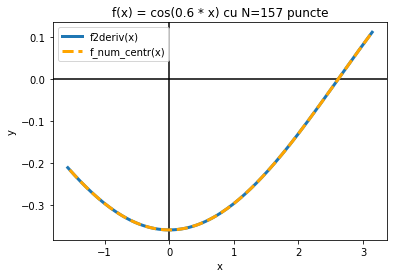

In [13]:
# plotare
plt.figure()
plt.axvline(0, c='black') # Adauga axa OY
plt.axhline(0, c='black') # Adauga axa OX
plt.xlabel('x') # Label pentru axa OX
plt.ylabel('y') # Label pentru axa OY

plt.plot(x, f2deriv(x), linestyle = '-', linewidth = 3, label = 'f2deriv(x)') # desenez graficul functiei f2deriv exacte
plt.plot(x[1: -1], f_num_centr[1: -1], linestyle = '--', linewidth = 3, label = 'f_num_centr(x)', c='orange')

plt.title('f(x) = cos(0.6 * x) cu N=' + str(n+1) + ' puncte') # Titlul figurii
plt.legend()
plt.show()

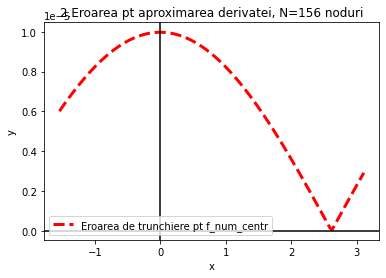

In [14]:
#Grafic eroare (pe nodurile interioare!!)
plt.figure()
plt.plot(x[1: -1], eroare_trunchiere(f_num_centr[1: -1], f2deriv(x[1: -1])), color = 'red', linewidth = 3, label = 'Eroarea de trunchiere pt f_num_centr', linestyle = '--')
plt.axvline(0, c='black') # Adauga axa OY
plt.axhline(0, c='black') # Adauga axa OX
plt.xlabel('x') # Label pentru axa OX
plt.ylabel('y') # Label pentru axa OY
plt.title('2.Eroarea pt aproximarea derivatei, N={} noduri'.format(n))
plt.legend()
plt.show()

## Ex 2
(a) Creati functia integrare care calculeaza valoarea aproximativa a integralei [...] conform formulelor de cuadratura sumate a dreptunghiului, trapezului si Simpson si are ca date de intrare:<br>
• functia de integrat, f;<br>
• vectorul x, o diviziune a intervalului [a, b];<br>
• sirul de caractere metoda ∈ {’dreptunghi’, ’trapez’, ’Simpson’};<br>
iar ca date de iesire:<br>
• aproximarea numerica a integralei I(f).<br>

(b) Sa se aproximeze valoarea integralei  [...]  pentru functia f(x) =  [...] , x ∈ [−10, 10],σ = 1.0, folosind cele 3 metode mentionate mai sus.

In [28]:
def integrare(f, x, metoda):
    y = f(x) # calcul f(x)
    h = x[1] - x[0]
    
    if metoda == 'dreptunghi':
        i = 2 * h * np.sum(y[0::2]) # suma din 2 in 2
    elif metoda == 'trapez':
        i = h/2 * (y[0] + 2 * np.sum(y[1:-1]) + y[-1]) # 2 * suma pana la penultimul element, apoi adaug ultimul element
    elif metoda == 'Simpson':
        i = h/3 * (y[0] + 4 * np.sum(y[1::2]) + 2 * np.sum(y[2:-1:2]) + y[-1])
    else:
        raise ValueError('metoda necunoscuta')
    
    return i

In [56]:
# b
def f(x):
    return 1/(sigma * np.sqrt(2*np.pi)) * np.e ** (- x**2 / (2 * sigma ** 2))
    
a, b = -10, 10 # intervalul
sigma = 1.0
n = 21 # numar de noduri (impar!)

valori_integrala = []
x = np.linspace(a, b, n) # discretizare
metode = ['dreptunghi', 'trapez', 'Simpson']

print('Valorile aproximative ale integralei date, calculate cu n={} noduri, sunt:'.format(n))
for metoda in metode:
    i = integrare(f, x, metoda)
    valori_integrala.append(i)
    print('metoda:', metoda, ', cu valoarea:', i)

Valorile aproximative ale integralei date, calculate cu n=21 noduri, sunt:
metoda: dreptunghi , cu valoarea: 1.0143837720622289
metoda: trapez , cu valoarea: 1.000000005350576
metoda: Simpson , cu valoarea: 0.9952054164466918
